written for https://stackoverflow.com/q/49943442/425458

In [109]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [97]:
from itertools import chain
import numpy as np

a = np.arange(1, 100)

def getIxs(xsize, nlow, nhigh):
    # get at least enough random chunk sizes in the specified range, ie nlow <= n <= nhigh
    ns = np.random.randint(nlow, nhigh+1, size=xsize//nlow)
    
    # add up the chunk sizes to get the indices at which we'll slice up the input array
    ixs = np.add.accumulate(ns)
    
    # truncate ixs so that its contents are all valid indices with respect to xs
    ixs = ixs[:np.searchsorted(ixs, xsize)]
    
    return ixs
    
def chunk(xs, nlow, nhigh):
    xs = np.asarray(xs)
    
    ixs = getIxs(xs.size, nlow, nhigh)
    
    # rerun getIxs until the size of the final chunk is large enough
    while (xs.size - ixs[-1]) < nlow:
        ixs = getIxs(xs.size, nlow, nhigh)
    
    # yield slices from the input array
    for start,end in zip(chain([None], ixs), chain(ixs, [None])):
        yield xs[start:end]

def chunkBlackjack(xs, nlow, nhigh):
    xs = np.asarray(xs)
    sizex = xs.size
    lowbound = sizex - nhigh
    highbound = sizex - nlow
    
    ns = []
    nsum = 0
    while True:
        rint = np.random.randint(nlow, nhigh + 1)
        ns.append(rint)
        nsum += rint
        
        if nsum > highbound:
            # we've gone "bust", start over
            ns = []
            nsum = 0
            continue
        elif lowbound < nsum <= highbound:
            # we've hit the sweet spot
            break

    ixs = np.add.accumulate(ns)
    # yield slices from the input array
    for start,end in zip(chain([None], ixs), chain(ixs, [None])):
        yield xs[start:end]
        
def numpy_fillna(data, dtype=int):
    # Get lengths of each row of data
    lens = np.array([len(i) for i in data])

    # Mask of valid places in each row
    mask = np.arange(lens.max()) < lens[:,None]

    # Setup output array and put elements from data into masked positions
    out = np.zeros(mask.shape, dtype=dtype)
    out[mask] = np.concatenate(data)
    return out

def chunks(xs, nlow, nhigh, rep):
    return [list(chunk(xs, nlow, nhigh)) for i in range(int(rep))]

def chunkSizes(xs, nlow, nhigh, rep):
    return [[x.size for x in c] for c in chunks(xs, nlow, nhigh, rep)]

    
# numpy_fillna(sizesJagged, dtype=int)
    
#     for i in range(rep):
#         arr[:, i] = [x.size for x in chunk(xs, nlow, nhigh)]
#     return arr
        
# list(chunk(a, 5, 10))

# jaggedArr = chunkSizes(a, 5, 10, int(1e5))
# jaggedArr = [[x for x in list(chunk(a, 5, 10))] for i in range(int(1e4))]
# jaggedArr = [list(chunk(a, 5, 10)) for i in range(int(1e4))]

In [117]:
jaggedArr = chunkSizes(a,5,10,1e5)
arr = numpy_fillna(jaggedArr).T
counts = [np.bincount(row) for row in arr]

In [118]:
counts

[array([    0,     0,     0,     0,     0, 16628, 16770, 16556, 16794, 16633, 16619]),
 array([    0,     0,     0,     0,     0, 16690, 16689, 16616, 16756, 16655, 16594]),
 array([    0,     0,     0,     0,     0, 16593, 16510, 17060, 16728, 16630, 16479]),
 array([    0,     0,     0,     0,     0, 16664, 16864, 16546, 16871, 16447, 16608]),
 array([    0,     0,     0,     0,     0, 16599, 16705, 16678, 16679, 16827, 16512]),
 array([    0,     0,     0,     0,     0, 16657, 16923, 16605, 16685, 16595, 16535]),
 array([    0,     0,     0,     0,     0, 16714, 16621, 16718, 16831, 16537, 16579]),
 array([    0,     0,     0,     0,     0, 16666, 16478, 16729, 16754, 16766, 16607]),
 array([    0,     0,     0,     0,     0, 16694, 16597, 16689, 16774, 16800, 16446]),
 array([    0,     0,     0,     0,     0, 16641, 16668, 16847, 16453, 16677, 16714]),
 array([    0,     0,     0,     0,     0, 16509, 16702, 16747, 16811, 16669, 16562]),
 array([  354,     0,     0,     0,     0, 

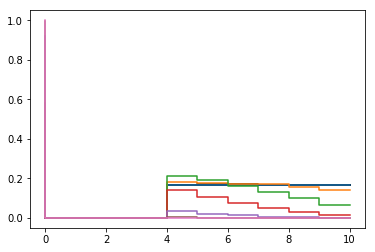

In [139]:
alphas = (1 - i*.05 if i > 9 else 1 for i in range(len(counts)))
colors = ('k' if i <= 9 else None for i in range(len(counts)))

for row in numpy_fillna(counts):
    plt.step(np.arange(11), row/counts[0].sum(), c=next(colors))

In [88]:
[np.diff(x).cumsum() for x in jaggedArr]

ValueError: operands could not be broadcast together with shapes (9,) (10,) 

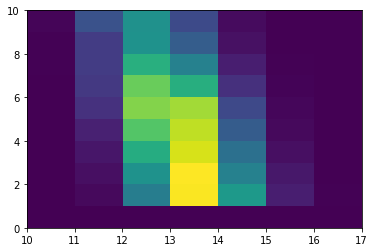

In [33]:
toes = [(len(l) - 1, l[-1]) for l in jaggedArr]

histout = plt.hist2d(*zip(*toes), bins=[np.arange(10,18), np.arange(11)])

In [35]:
histout[0].astype(int)

array([[   0,    0,    0,    1,    4,   11,   11,   27,   39,   78],
       [   0,  163,  273,  389,  594,  935, 1070, 1159, 1167, 1630],
       [   0, 2753, 3317, 4028, 4763, 5294, 5013, 4088, 3321, 3291],
       [   0, 6469, 6500, 6117, 5885, 5597, 4082, 2866, 1908, 1453],
       [   0, 3496, 2844, 2399, 1902, 1446,  900,  549,  298,  180],
       [   0,  540,  414,  278,  163,  107,   69,   36,   10,    7],
       [   0,   27,   22,    7,    9,    1,    0,    0,    0,    0]])

In [ ]:
xs = np.arange(1, 100)

ns = np.random.randint(nlow, nhigh+1, size=xs.size//nlow)
ixs = np.add.accumulate(ns)
np.searchsorted(np.arange(1, 100), 99)

In [24]:
np.set_printoptions(linewidth=200)
counts_1e6

[array([     0,      0,      0,      0,      0, 166138, 167070, 166622, 166856, 166604, 166710]),
 array([     0,      0,      0,      0,      0, 166896, 166989, 166841, 166569, 166419, 166286]),
 array([     0,      0,      0,      0,      0, 166153, 165707, 167479, 167505, 166450, 166706]),
 array([     0,      0,      0,      0,      0, 166553, 166954, 166918, 165633, 166541, 167401]),
 array([     0,      0,      0,      0,      0, 166804, 166708, 167011, 166427, 166802, 166248]),
 array([     0,      0,      0,      0,      0, 166280, 166956, 166374, 167006, 166665, 166719]),
 array([     0,      0,      0,      0,      0, 166306, 166671, 167145, 166038, 166946, 166894]),
 array([     0,      0,      0,      0,      0, 166911, 166300, 166634, 166494, 166631, 167030]),
 array([     0,      0,      0,      0,      0, 166178, 166623, 166441, 166995, 166921, 166842]),
 array([     0,      0,      0,      0,      0, 166962, 166817, 166282, 167226, 166515, 166198]),
 array([     0,     

In [23]:
counts

[array([   0,    0,    0,    0,    0, 1670, 1721, 1664, 1663, 1696, 1586]),
 array([   0,    0,    0,    0,    0, 1671, 1660, 1646, 1708, 1695, 1620]),
 array([   0,    0,    0,    0,    0, 1648, 1679, 1718, 1644, 1685, 1626]),
 array([   0,    0,    0,    0,    0, 1623, 1613, 1678, 1709, 1711, 1666]),
 array([   0,    0,    0,    0,    0, 1629, 1638, 1636, 1683, 1753, 1661]),
 array([   0,    0,    0,    0,    0, 1686, 1668, 1595, 1742, 1679, 1630]),
 array([   0,    0,    0,    0,    0, 1698, 1688, 1625, 1715, 1613, 1661]),
 array([   0,    0,    0,    0,    0, 1744, 1713, 1627, 1638, 1676, 1602]),
 array([   0,    0,    0,    0,    0, 1662, 1637, 1706, 1689, 1662, 1644]),
 array([   0,    0,    0,    0,    0, 1743, 1648, 1687, 1736, 1626, 1560]),
 array([   0,    0,    0,    0,    1, 1694, 1733, 1620, 1669, 1617, 1666]),
 array([  19,   19,   24,   36,   64, 1715, 1682, 1659, 1722, 1537, 1523]),
 array([ 738,  253,  344,  394,  476, 1743, 1574, 1461, 1231,  988,  798]),
 array([4276

In [8]:
np.array([[1, 2, 3, 4, 0, 0, 0],
       [2, 3, 1, 0, 0, 0, 0],
       [5, 5, 5, 5, 8, 9, 5],
       [1, 1, 0, 0, 0, 0, 0]], dtype=object).T

array([[1, 2, 5, 1],
       [2, 3, 5, 1],
       [3, 1, 5, 0],
       [4, 0, 5, 0],
       [0, 0, 8, 0],
       [0, 0, 9, 0],
       [0, 0, 5, 0]], dtype=object)

You should be aware, however, that in both this and my previous answer the final chunk will always tend to be somewhat shorter than the others (though it still will have a random size). The reason why is complicated, but the short version is that splitting an array into randomly sized chunks is a variation on the old "how do you generate x random numbers that sum to y?" problem. The shrimpy size of the last random number is then a consequence of the "boundary" that the sum condition imposes.

In [142]:
def randSumToX_diff(x, n):
    return np.diff([0] + sorted(np.random.randint(0,x+1,size=n-1).tolist()) + [x])

In [157]:
arr = np.array([randSumToX_diff(100, 3) for i in range(int(1e5))])
counts = [np.bincount(row) for row in arr.T]

In [158]:
counts

[array([1977, 1905, 1919, 1905, 1891, 1834, 1843, 1895, 1822, 1860, 1801, 1711, 1730, 1760, 1672, 1726, 1627, 1632, 1625, 1597, 1612, 1509, 1492, 1543, 1496, 1465, 1445, 1457, 1452, 1357, 1404, 1333,
        1336, 1381, 1343, 1300, 1331, 1192, 1272, 1207, 1207, 1196, 1145, 1128, 1085, 1073, 1038, 1015, 1089, 1029, 1035,  950,  967,  892,  908,  921,  840,  825,  817,  844,  809,  789,  743,  770,
         728,  663,  640,  660,  644,  573,  579,  595,  555,  514,  460,  463,  466,  461,  442,  393,  403,  340,  373,  363,  328,  322,  308,  263,  246,  222,  227,  189,  150,  158,  157,   98,
          83,   66,   51,   33,   10]),
 array([ 982, 1994, 1930, 1916, 1885, 1886, 1860, 1884, 1802, 1806, 1798, 1864, 1771, 1744, 1721, 1750, 1706, 1699, 1505, 1597, 1520, 1600, 1522, 1491, 1518, 1486, 1447, 1438, 1445, 1431, 1381, 1379,
        1389, 1319, 1304, 1289, 1222, 1324, 1159, 1196, 1220, 1146, 1133, 1122, 1106, 1128, 1097, 1062, 1038, 1006,  983, 1012, 1027,  903,  938,  903,  869,  8